# Feature Selection for Henry's Law constants Dataset

In [1]:
import pandas as pd
import numpy as np

import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
rdkit.__version__

'2021.09.2'

In [3]:
# load Henry's law constant dataset
df = pd.read_csv('hcp_values.csv')

In [4]:
df

,Species,InChIKey,Hcp
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008
...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016


In [5]:
# grabbed corresponding SMILES from InChIKey using PubChem Identifier Exchange
smiles = pd.read_csv('hcp_inchikey_smiles.txt', sep='\t', header=None)

In [6]:
smiles

,0,1
0,MYMOFIZGZYHOMD-UHFFFAOYSA-N,O=O
1,CBENFWSGALASAD-UHFFFAOYSA-N,[O-][O+]=O
2,YZCKVEUIGOORGS-UHFFFAOYSA-N,[H]
3,UFHFLCQGNIYNRP-UHFFFAOYSA-N,[4HH]
4,UFHFLCQGNIYNRP-UHFFFAOYSA-N,[HH]
...,...,...
4783,KHQJREYATBQBHY-UHFFFAOYSA-N,CC[Pb](C)(C)C
4784,OLOAJSHVLXNSQV-UHFFFAOYSA-N,CC[Pb](C)(C)CC
4785,KGFRUGHBHNUHOS-UHFFFAOYSA-N,CC[Pb](C)(CC)CC
4786,MRMOZBOQVYRSEM-UHFFFAOYSA-N,CC[Pb](CC)(CC)CC


In [7]:
# adding SMILES where InChIKeys match up (it is in the same order)
df['SMILES'] = smiles[1]

In [8]:
df

,Species,InChIKey,Hcp,SMILES
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,[O-][O+]=O
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H]
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[4HH]
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[HH]
...,...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,CCOP(=S)(OCC)OC1=CC=C(C=C1)[N+](=O)[O-]
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CCC1=NC(=CC(=N1)OP(=S)(OC)OC)OCC
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CCNP(=S)(OC)O/C(=C/C(=O)OC(C)C)/C
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CCOC(=O)N(C)C(=O)CSP(=S)(OCC)OCC


In [9]:
df.dropna(inplace=True)

In [10]:
df

,Species,InChIKey,Hcp,SMILES
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,[O-][O+]=O
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H]
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[4HH]
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[HH]
...,...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,CCOP(=S)(OCC)OC1=CC=C(C=C1)[N+](=O)[O-]
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CCC1=NC(=CC(=N1)OP(=S)(OC)OC)OCC
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CCNP(=S)(OC)O/C(=C/C(=O)OC(C)C)/C
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CCOC(=O)N(C)C(=O)CSP(=S)(OCC)OCC


In [11]:
df.rename(columns={1: 'SMILES'}, inplace=True)

In [12]:
# adding a Mol column into the dataframe which can be utilised by rdkit
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Mol')

In [13]:
descriptors = list(rdMolDescriptors.Properties.GetAvailableProperties())

get_descriptors = rdMolDescriptors.Properties(descriptors)

In [14]:
df['Descriptors'] = [get_descriptors.ComputeProperties(mol) for mol in df['Mol']]

,Species,InChIKey,Hcp,SMILES,Mol,Descriptors
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012,O=O,,"[31.98982924, 31.998, 2.0, 0.0, 0.0, 0.0, 2.0,..."
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100,[O-][O+]=O,,"[47.984743859999995, 47.997, 3.0, 0.0, 0.0, 0...."
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003,[H],,"[1.007825032, 1.008, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008,[4HH],,"[5.035635032, 5.03581, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008,[HH],,"[2.015650064, 2.016, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016,CCOP(=S)(OCC)OC1=CC=C(C=C1)[N+](=O)[O-],,"[291.03303017799993, 291.26500000000004, 6.0, ..."
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028,CCC1=NC(=CC(=N1)OP(=S)(OC)OC)OCC,,"[292.064664654, 292.297, 6.0, 0.0, 7.0, 0.0, 7..."
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021,CCNP(=S)(OC)O/C(=C/C(=O)OC(C)C)/C,,"[281.08506575, 281.314, 5.0, 1.0, 7.0, 1.0, 5...."
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016,CCOC(=O)N(C)C(=O)CSP(=S)(OCC)OCC,,"[329.05205136999996, 329.3800000000001, 6.0, 0..."

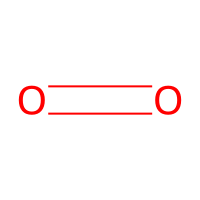
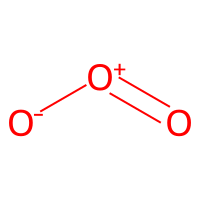
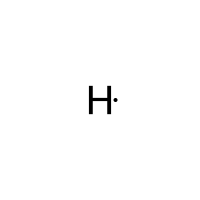
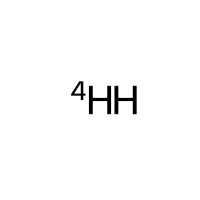
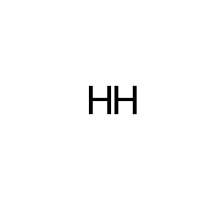
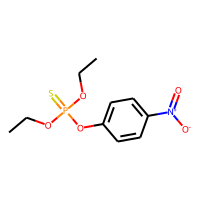
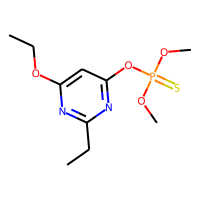
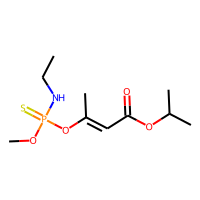
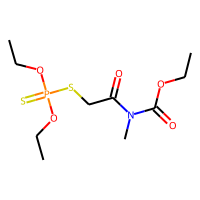
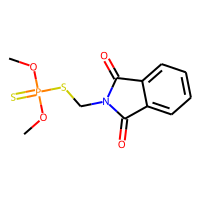

In [15]:
df